reference https://www.kaggle.com/code/aditya9790/godaddy-eda-for-beginners/notebook

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt
import seaborn as sns

In [7]:
import os
for dirname, _, filenames in os.walk('../godaddy-microbusiness-density-forecasting/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


../godaddy-microbusiness-density-forecasting/census_starter.csv
../godaddy-microbusiness-density-forecasting/test.csv
../godaddy-microbusiness-density-forecasting/train.csv
../godaddy-microbusiness-density-forecasting/sample_submission.csv


In [8]:
train = pd.read_csv('../godaddy-microbusiness-density-forecasting/train.csv')
test = pd.read_csv('../godaddy-microbusiness-density-forecasting/test.csv')
census = pd.read_csv('../godaddy-microbusiness-density-forecasting/census_starter.csv')
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


* train.csv :

    * **row_id** : An ID code for the row.
    * **cfips** : A unique identifier for each county using the Federal Information Processing System. The first two digits correspond to the state FIPS code, while the following 3 represent the county.
    * **county_name** : The written name of the county.
    * **state_name** : The name of the state.
    * **first_day_of_month** : The date of the first day of the month.
    * **microbusiness_density** : Microbusinesses per 100 people over the age of 18 in the given county. This is the target variable. The population figures used to calculate the density are on a two-year lag due to the pace of update provided by the U.S. Census Bureau, which provides the underlying population data annually. 2021 density figures are calculated using 2019 population figures, etc.
    * **active** : The raw count of microbusinesses in the county. Not provided for the test set.

In [12]:
train['first_day_of_month'] = pd.to_datetime(train['first_day_of_month'])
train = train.sort_values(['cfips','first_day_of_month']).reset_index(drop=True)

train['year'] = train['first_day_of_month'].dt.year
train['month'] = train['first_day_of_month'].dt.month
train['year_month'] = train['first_day_of_month'].dt.strftime('%Y-%m')


In [13]:
train.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year_month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,2019-08
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,2019-09
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,2019-10
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,2019-11
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,2019-12


## Plot the microbussiness density by year and month

/var/folders/r5/njrdd_kj5_scbmjbx7t4dc1r0000gq/T/ipykernel_68511/1062955802.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=train.groupby('year').mean(), x = 'year', y = 'microbusiness_density', ax=ax[0], color='red')
/var/folders/r5/njrdd_kj5_scbmjbx7t4dc1r0000gq/T/ipykernel_68511/1062955802.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(data=train.groupby('month').mean(), x = 'month', y = 'microbusiness_density', ax=ax[1], color='orange')


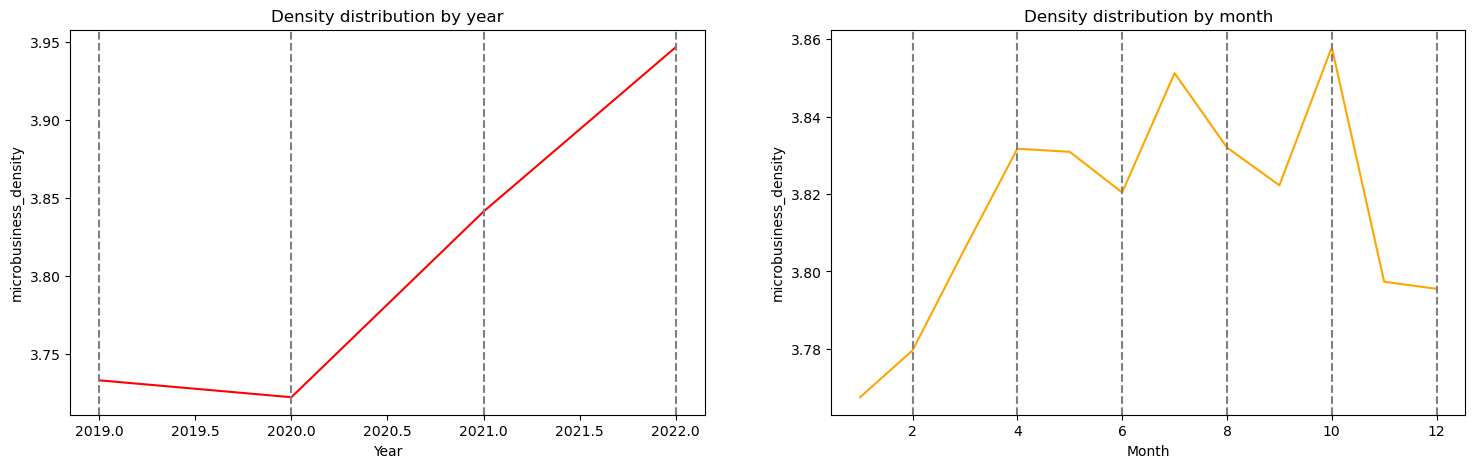

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(data=train.groupby('year').mean(), x = 'year', y = 'microbusiness_density', ax=ax[0], color='red')
for i in range(2019, 2023): ax[0].axvline(x = i, color='grey', linestyle='--')
    
sns.lineplot(data=train.groupby('month').mean(), x = 'month', y = 'microbusiness_density', ax=ax[1], color='orange')
for i in range(2, 13, 2): ax[1].axvline(x = i, color='grey', linestyle='--')


ax[0].set_title('Density distribution by year')
ax[0].set_xlabel('Year')
ax[1].set_title('Density distribution by month')
ax[1].set_xlabel('Month')

plt.show()

## Plot the distribution of microbusiness density monthwise

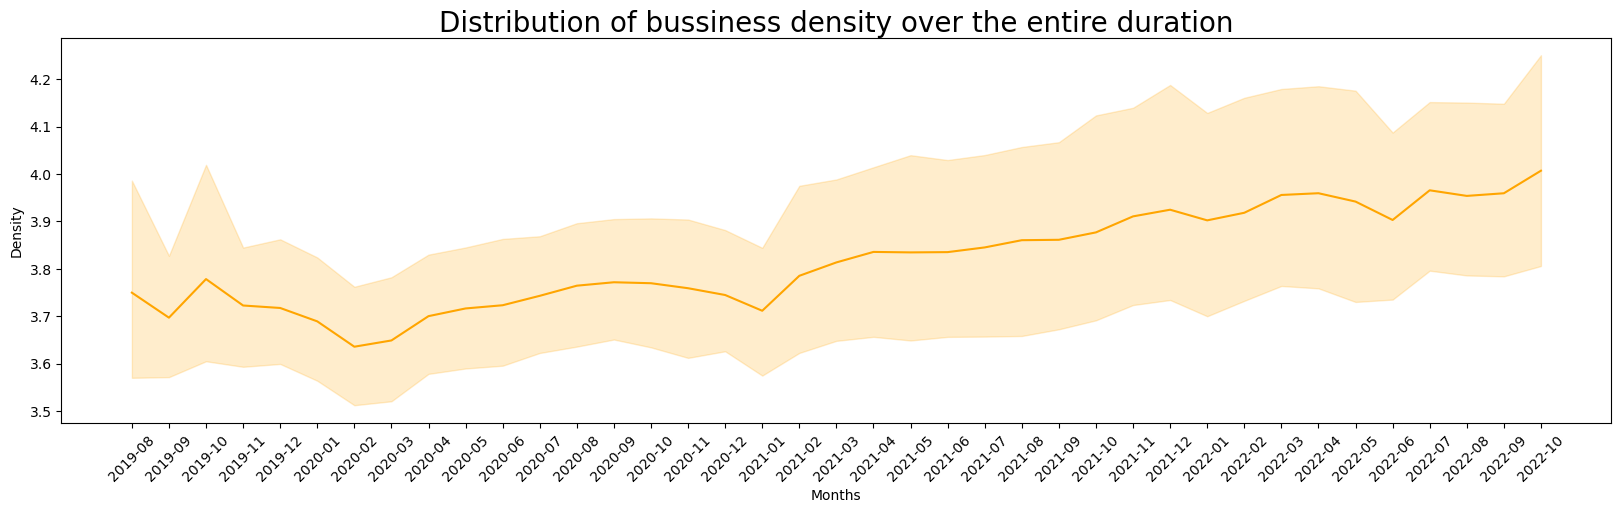

In [15]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=train, x = 'year_month', y = 'microbusiness_density', color='orange')
plt.xticks(rotation=45)
plt.xlabel('Months')
plt.ylabel('Density')
plt.title('Distribution of bussiness density over the entire duration', 
          fontdict={'fontsize': 20,
        'fontweight': 3, 'verticalalignment': 'center',
        'horizontalalignment': 'center'})
plt.show()


## Plot statewise active bussiness 

In [16]:
plt.rc('figure', figsize=(20, 5))

def plot_bar(df, y_val, xlbl, ylbl, title, xpos=0, ypos=0, annotate=True):
    df_bar = sns.barplot(x =df.index, y =  df[y_val].sort_values())
    if annotate:
        for p in df_bar.patches:
            df_bar.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + xpos + p.get_width() / 2., p.get_height() + ypos), 
                           ha = 'center', va = 'center', 
                           size=10,
                           xytext = (0, -12), 
                           textcoords = 'offset points')
    plt.xticks(rotation=90)
    plt.xlabel(xlbl) # set x label
    plt.ylabel(ylbl) # set y label
    plt.title(title, # give title to plot
          fontdict={'fontsize': 20,
        'fontweight': 3, 'verticalalignment': 'center',
        'horizontalalignment': 'center'})

    plt.show()

In [17]:
train[(train['state']=='North Dakota') | (train['state']=='District of Columbia')].head()# .groupby('state').mean()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year_month
12363,11001_2019-08-01,11001,District of Columbia,District of Columbia,2019-08-01,13.275414,73590,2019,8,2019-08
12364,11001_2019-09-01,11001,District of Columbia,District of Columbia,2019-09-01,13.262966,73521,2019,9,2019-09
12365,11001_2019-10-01,11001,District of Columbia,District of Columbia,2019-10-01,13.284073,73638,2019,10,2019-10
12366,11001_2019-11-01,11001,District of Columbia,District of Columbia,2019-11-01,13.346310,73983,2019,11,2019-11
12367,11001_2019-12-01,11001,District of Columbia,District of Columbia,2019-12-01,13.457254,74598,2019,12,2019-12


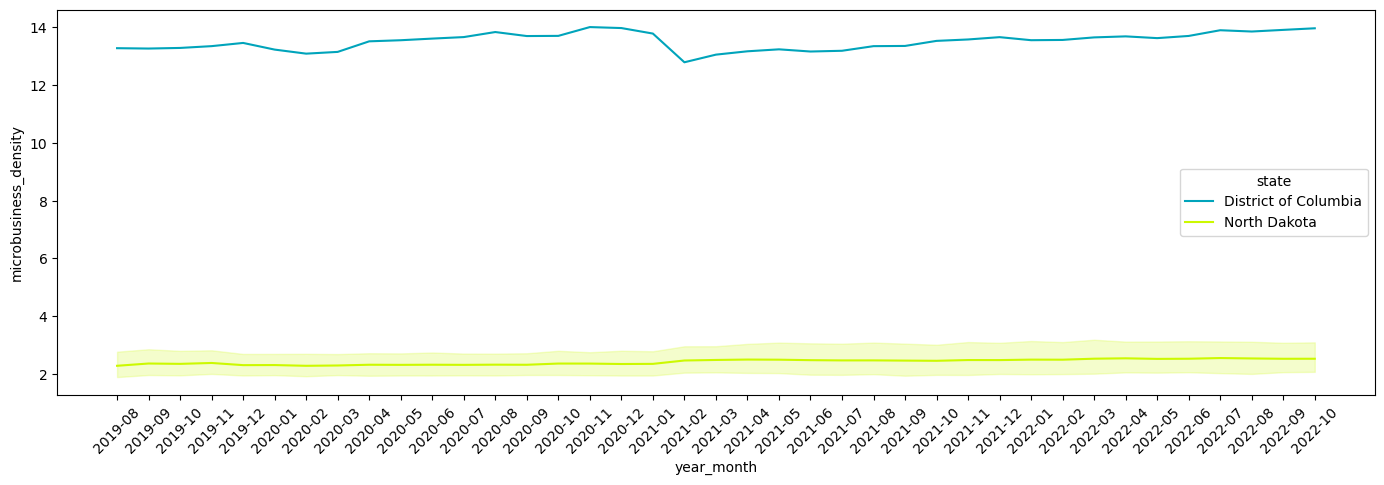

In [18]:
high_low_density = train[(train['state']=='North Dakota') | (train['state']=='District of Columbia')]
plt.figure(figsize=(17, 5))
sns.lineplot(data=high_low_density[high_low_density['state'].isin(['District of Columbia', 'North Dakota'])] , x='year_month', y='microbusiness_density', palette='nipy_spectral', hue='state')
plt.xticks(rotation=45)
plt.show()

## Plot Active bussiness Vs States

/var/folders/r5/njrdd_kj5_scbmjbx7t4dc1r0000gq/T/ipykernel_68511/3268777149.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statewise_active = train.groupby('state').mean().sort_values('active')


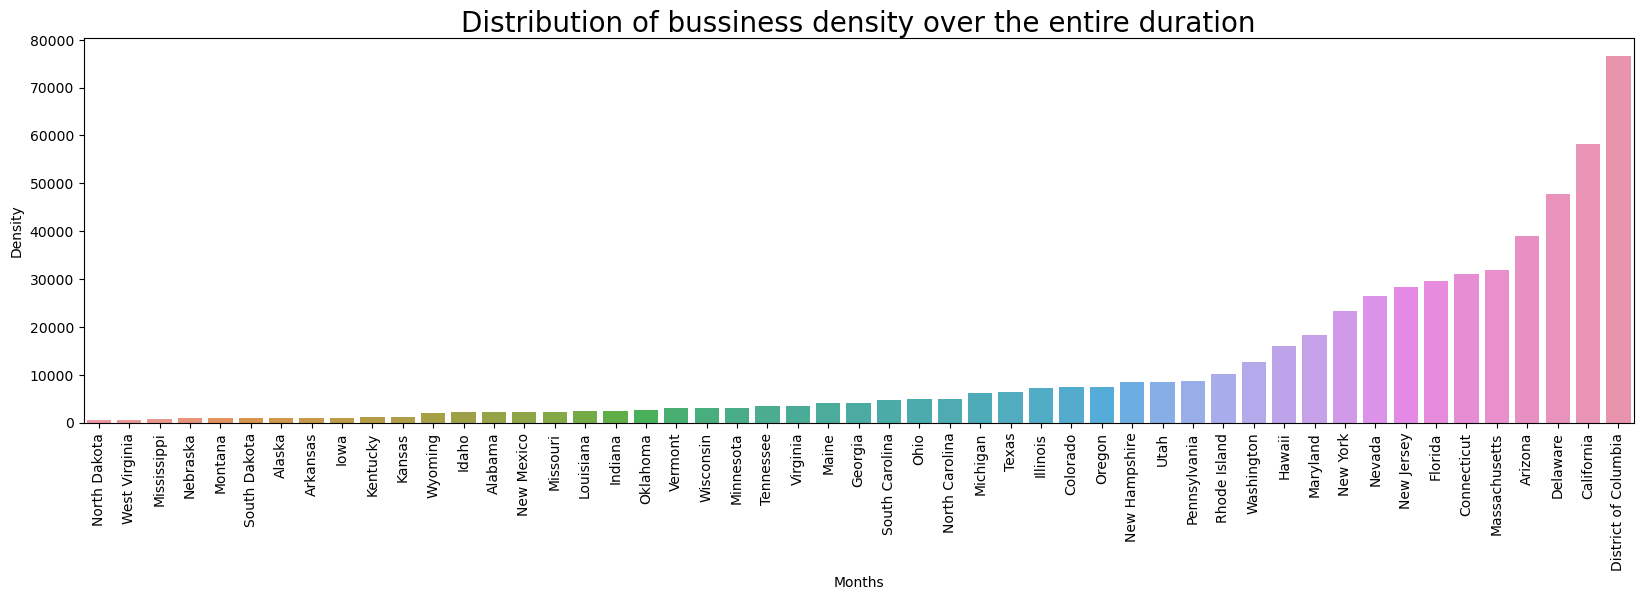

In [19]:
statewise_active = train.groupby('state').mean().sort_values('active')
plot_bar(statewise_active,'active', 'Months', 'Density', 'Distribution of bussiness density over the entire duration', annotate=False)

## Plot microbussiness Density Vs State

/var/folders/r5/njrdd_kj5_scbmjbx7t4dc1r0000gq/T/ipykernel_68511/551796245.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  statewise_density = train.groupby(['state']).mean().sort_values('microbusiness_density') #['state', 'microbusiness_density']


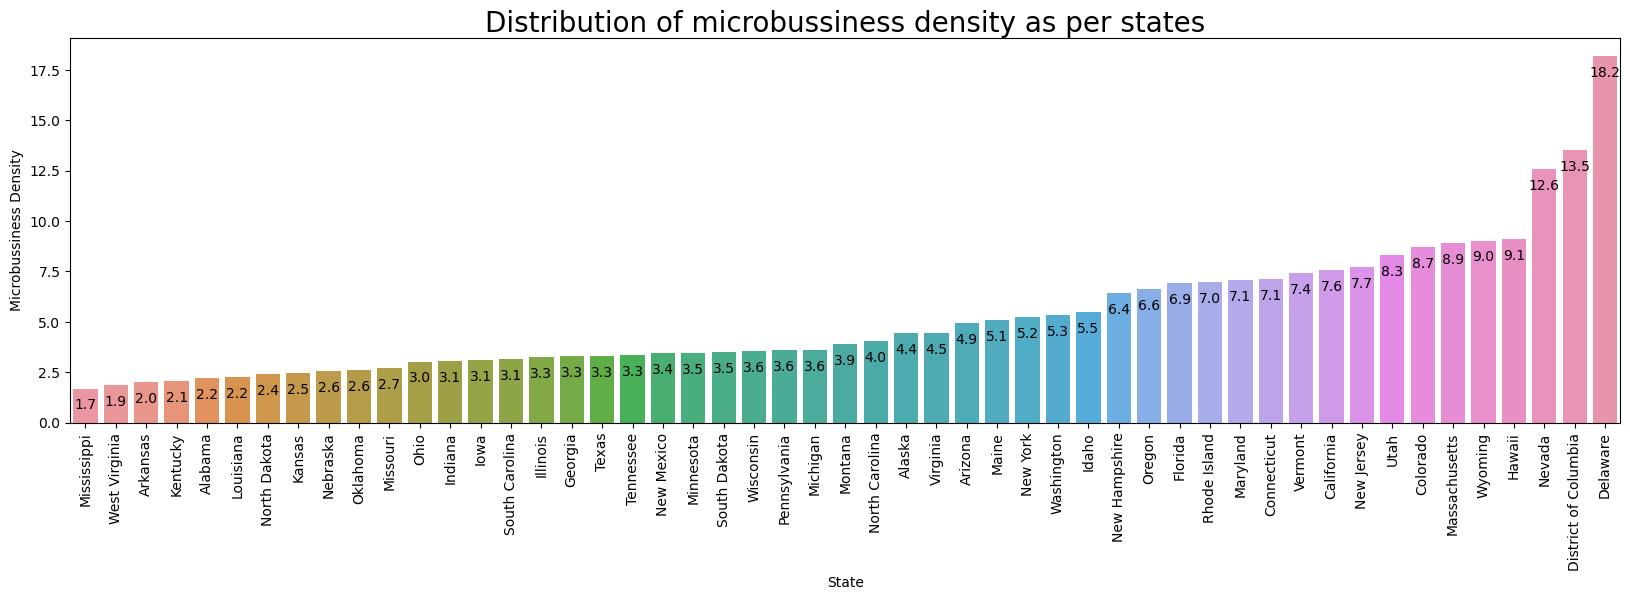

In [20]:
statewise_density = train.groupby(['state']).mean().sort_values('microbusiness_density') #['state', 'microbusiness_density']
plot_bar(statewise_density, 'microbusiness_density', 'State', 'Microbussiness Density', 'Distribution of microbussiness density as per states')


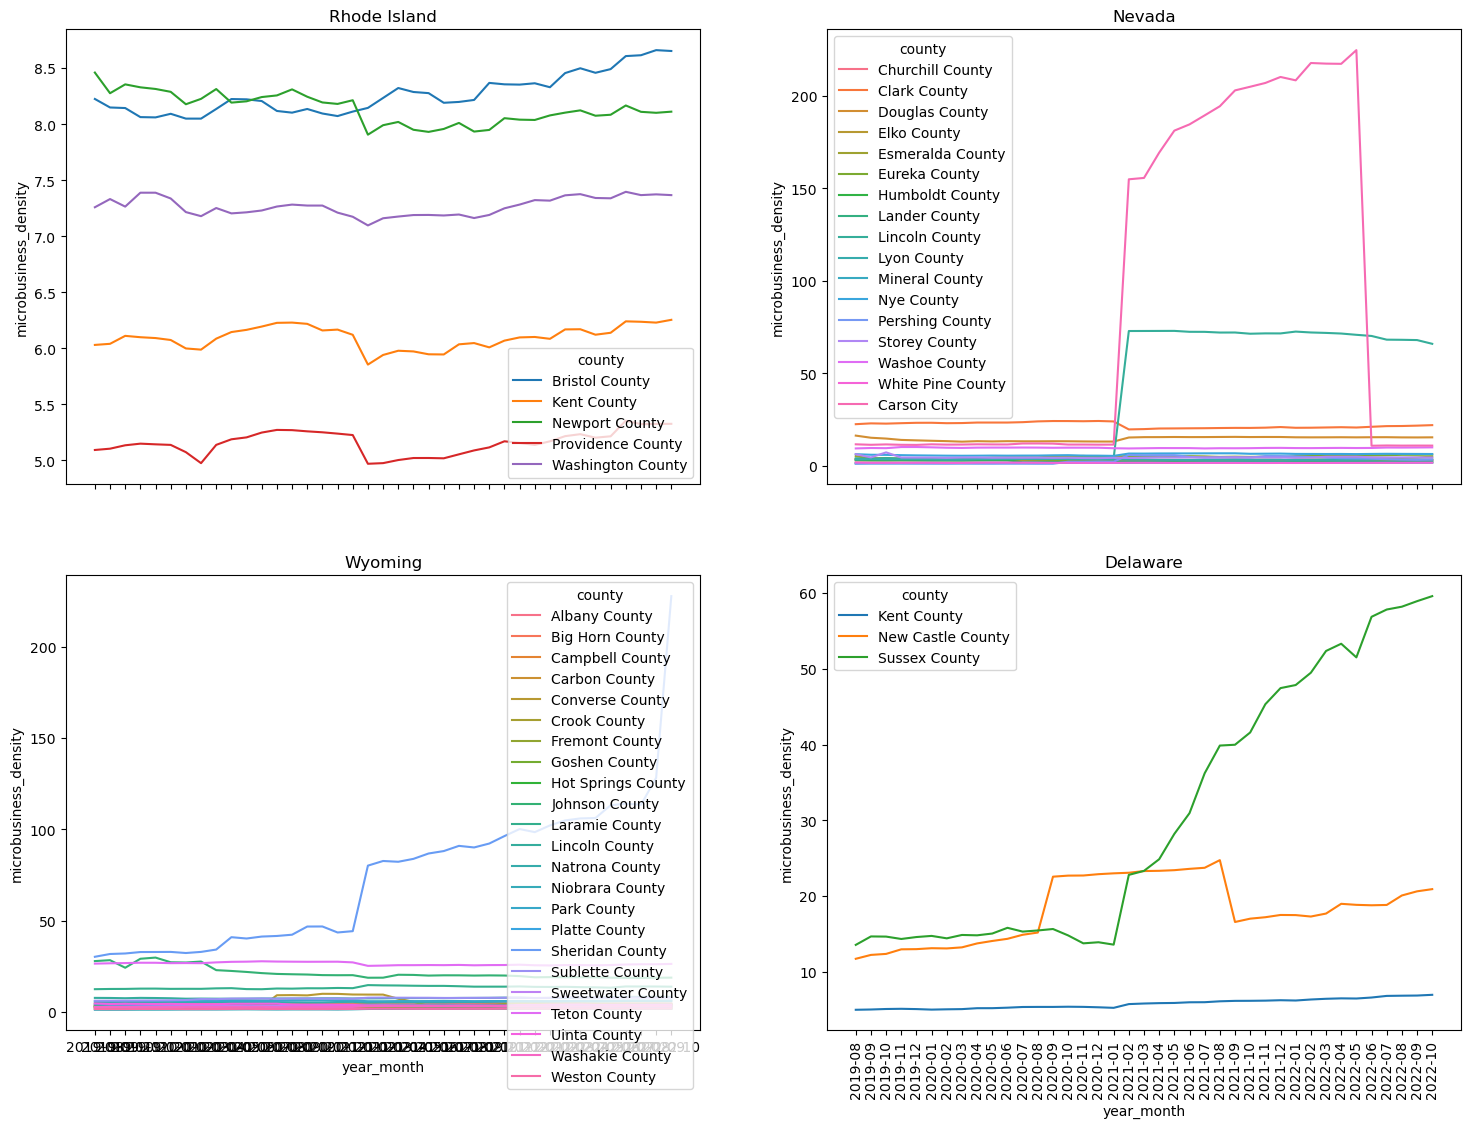

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(18,13), sharex=True)

axes[0, 0].title.set_text('Rhode Island')
sns.lineplot(data = train[train['state']=='Rhode Island'], 
             x = 'year_month', y = 'microbusiness_density', hue='county', ax=axes[0, 0])

axes[0, 1].title.set_text('Nevada')
sns.lineplot(data = train[train['state']=='Nevada'], 
             x = 'year_month', y = 'microbusiness_density', hue='county', ax=axes[0, 1])

axes[1, 0].title.set_text('Wyoming')
sns.lineplot(data = train[train['state']=='Wyoming'], 
             x = 'year_month', y = 'microbusiness_density', hue='county', ax=axes[1, 0])

axes[1, 1].title.set_text('Delaware')
sns.lineplot(data = train[train['state']=='Delaware'], 
             x = 'year_month', y = 'microbusiness_density', hue='county', ax=axes[1, 1])

plt.xticks(rotation=90)
plt.show()